In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

In [27]:
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_augmented.csv', encoding = 'latin1')

In [28]:
print("=== INFO ===")
print(df.info())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28623 entries, 0 to 28622
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Contract_ID                26593 non-null  object 
 1   Gender                     28623 non-null  int64  
 2   Age                        28623 non-null  int64  
 3   Region                     26593 non-null  object 
 4   Managing Branch            26593 non-null  object 
 5   Sales Unit                 9272 non-null   object 
 6   Selling branch             24832 non-null  object 
 7   Sales Region               24832 non-null  object 
 8   Creation Date              28623 non-null  object 
 9   OrderID/RegCode            21282 non-null  object 
 10  Transaction Code           1255 non-null   object 
 11  Type                       20462 non-null  object 
 12  FG Package Command         23622 non-null  object 
 13  Payment Month              28623 

In [29]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all'))


=== DESCRIBE ===
                  Contract_ID        Gender           Age          Region  \
count                   26593  28623.000000  28623.000000           26593   
unique                  26539           NaN           NaN              15   
top     HD4018334318042840576           NaN           NaN  07.Ho Chi Minh   
freq                        3           NaN           NaN           15370   
mean                      NaN      0.445970     41.028159             NaN   
std                       NaN      0.497081     10.804223             NaN   
min                       NaN      0.000000     16.000000             NaN   
25%                       NaN      0.000000     33.000000             NaN   
50%                       NaN      0.000000     41.000000             NaN   
75%                       NaN      1.000000     49.000000             NaN   
max                       NaN      1.000000     66.000000             NaN   

       Managing Branch Sales Unit Selling branch    Sales

In [30]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())




=== MISSING VALUES ===
Contract_ID                   2030
Gender                           0
Age                              0
Region                        2030
Managing Branch               2030
Sales Unit                   19351
Selling branch                3791
Sales Region                  3791
Creation Date                    0
OrderID/RegCode               7341
Transaction Code             27368
Type                          8161
FG Package Command            5001
Payment Month                    0
Revenue                          0
Sales Channel                 1133
Status FGame                     0
Active Date                   2923
Service Start Date            8062
Service End Date              8063
Internet Package              2924
Cancellation Date            15199
Sales Method                     0
Customer Satisfaction            0
Complaints Count                 0
Support Call Count               0
Ping Issue Count                 0
Avg Download Speed (Mbps)      

In [31]:
# Remove row contain "Bundle"
df = df[df['Sales Method'] != 'Bundle']


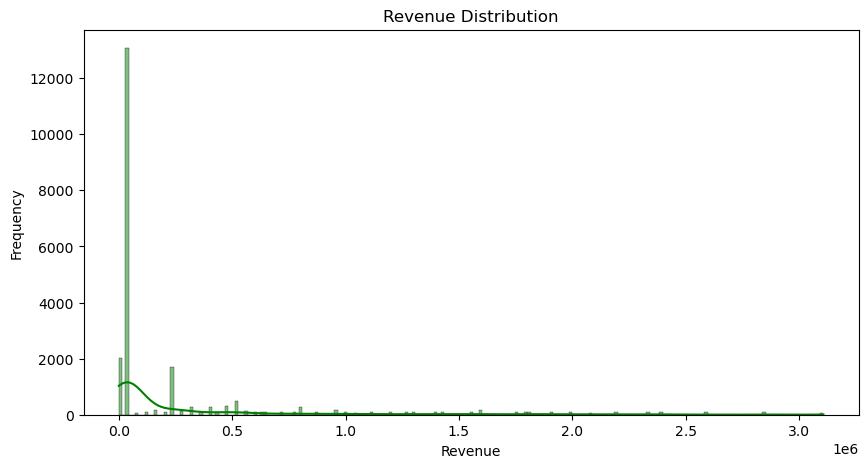

In [32]:
# ---------------------------
# 2. REVENUE DISTRIBUTION
# ---------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [33]:
from dateutil import parser
# Force full parsing first (convert all to datetime)
def parse_mixed_date_force(date_str):
    try:
        return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
    except:
        return pd.NaT

df['Creation Date'] = df['Creation Date'].apply(parse_mixed_date_force)

# Now format to consistent dd/mm/yyyy
df['Creation Date'] = pd.to_datetime(df['Creation Date'], format='%d/%m/%Y', errors='coerce')
    
# Group by month and compute total revenue
df['month'] = df['Creation Date'].dt.to_period('M')
monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()
monthly_revenue = monthly_revenue[monthly_revenue > 0].reset_index()




df

/tmp/ipykernel_25147/210790394.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()


,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,Creation Date,OrderID/RegCode,...,Sales Method,Customer Satisfaction,Complaints Count,Support Call Count,Ping Issue Count,Avg Download Speed (Mbps),Avg Upload Speed (Mbps),Promotion Used,Data Usage (GB),month
0,SIM1000000952,0,56,04.Hai Phong,BTE,NaN,HBH,13.Tay Nguyen - Mien Trung,2023-12-03,SIMORDER952,...,Extra,4,1,2,1,84.55,24.40,BundleOffer,140.25,2023-12
1,SIM1000003875,0,28,06.Khanh Hoa,NBH,OBB,DNI,01.Ha Noi,2023-12-03,SIMORDER3875,...,Code,5,2,2,0,129.79,18.85,NaN,136.37,2023-12
2,SIM1000004226,0,25,10.Vung Tau,BTN,IBB,SLA,10.Vung Tau,2023-12-03,SIMORDER4226,...,Code,3,1,1,0,58.02,22.55,FreeMonth,27.11,2023-12
3,SIM1000002839,0,18,07.Ho Chi Minh,DLK,OBB,TGG,02.Quang Ninh,2023-12-04,SIMORDER2839,...,Code,5,1,0,0,92.41,25.24,Discount10%,114.02,2023-12
4,SIM1000003079,0,36,06.Khanh Hoa,HCM_03,CBB,HNI_02,10.Vung Tau,2023-12-04,SIMORDER3079,...,Code,5,0,3,0,97.39,22.31,NaN,122.73,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28612,HD6947853555768798208,0,38,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-09-09,SGK30127543,...,Code,2,2,0,0,88.19,25.14,BundleOffer,49.52,2024-09
28614,HD698416612974033920,0,45,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-09-09,SGK30127764,...,Code,1,0,1,0,124.75,18.20,Discount10%,101.53,2024-09
28615,HD6998154843091532800,0,32,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-09-09,SGK30127727,...,Code,4,0,0,1,88.87,22.61,FreeMonth,85.84,2024-09
28616,HD8239226546906249216,0,32,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-09-09,SGK30127521,...,Code,5,0,2,0,104.73,17.46,Discount10%,79.58,2024-09


In [34]:
#df.to_excel('output.xlsx', index=False)


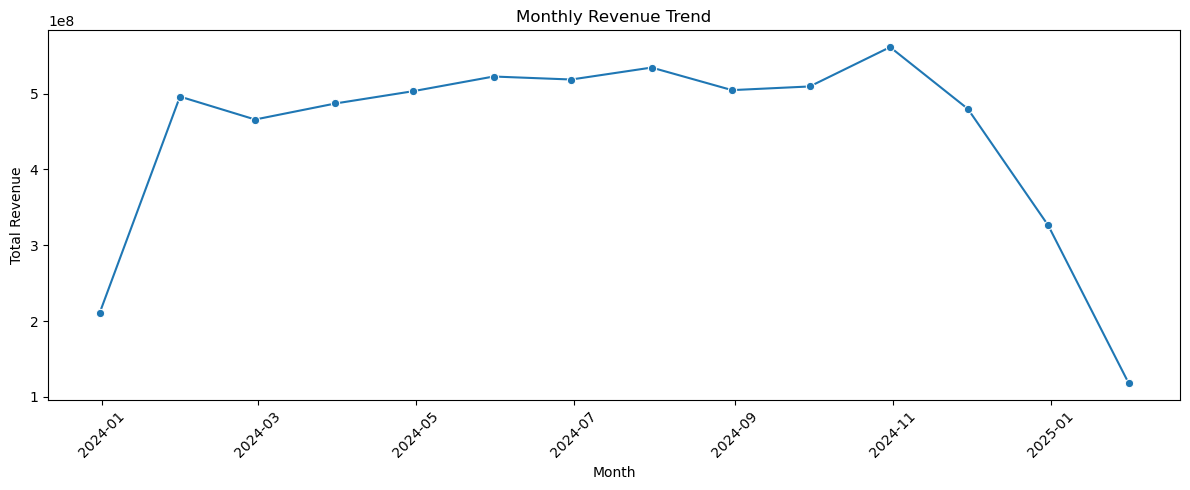

Month-over-Month Revenue Changes:
   Creation Date    Revenue  Revenue_diff  Revenue_pct_change
0     2023-12-31  210459000           NaN                 NaN
1     2024-01-31  496037200   285578200.0          135.693033
2     2024-02-29  465794600   -30242600.0           -6.096841
3     2024-03-31  486965400    21170800.0            4.545093
4     2024-04-30  503160600    16195200.0            3.325739
5     2024-05-31  522494400    19333800.0            3.842471
6     2024-06-30  518552300    -3942100.0           -0.754477
7     2024-07-31  534323500    15771200.0            3.041390
8     2024-08-31  504557600   -29765900.0           -5.570764
9     2024-09-30  509392200     4834600.0            0.958186
10    2024-10-31  561266400    51874200.0           10.183548
11    2024-11-30  479790200   -81476200.0          -14.516493
12    2024-12-31  326117200  -153673000.0          -32.029208
13    2025-01-31  118383300  -207733900.0          -63.699155


In [35]:


# ---------------------------
# 5. Compute changes
# ---------------------------
monthly_revenue['Revenue_diff'] = monthly_revenue['Revenue'].diff()
monthly_revenue['Revenue_pct_change'] = monthly_revenue['Revenue'].pct_change() * 100

# ---------------------------
# 6. Plot Monthly Revenue
# ---------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x='Creation Date', y='Revenue', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Optional: Show MoM changes
# ---------------------------
print("Month-over-Month Revenue Changes:")
print(monthly_revenue[['Creation Date', 'Revenue', 'Revenue_diff', 'Revenue_pct_change']])

In [36]:
monthly_revenue

,Creation Date,Revenue,Revenue_diff,Revenue_pct_change
0,2023-12-31,210459000,NaN,NaN
1,2024-01-31,496037200,285578200.0,135.693033
2,2024-02-29,465794600,-30242600.0,-6.096841
3,2024-03-31,486965400,21170800.0,4.545093
4,2024-04-30,503160600,16195200.0,3.325739
5,2024-05-31,522494400,19333800.0,3.842471
6,2024-06-30,518552300,-3942100.0,-0.754477
7,2024-07-31,534323500,15771200.0,3.041390
8,2024-08-31,504557600,-29765900.0,-5.570764
9,2024-09-30,509392200,4834600.0,0.958186


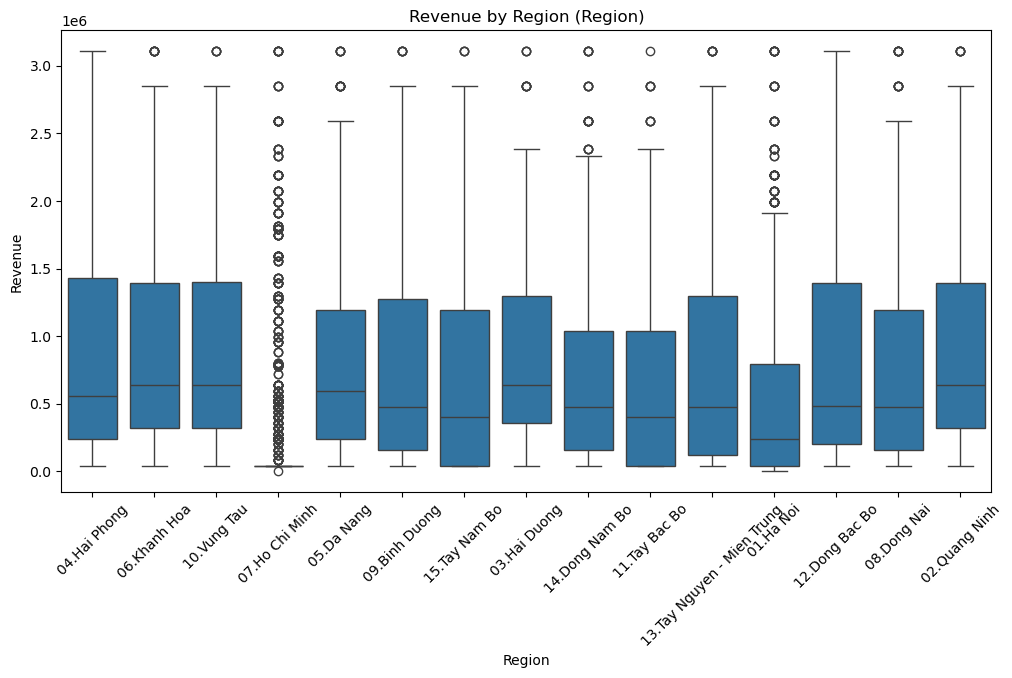


=== AVERAGE REVENUE BY REGION ===
Region
06.Khanh Hoa                  939097.375328
10.Vung Tau                   913470.673077
02.Quang Ninh                 913263.276836
04.Hai Phong                  882246.115288
03.Hai Duong                  876291.758242
12.Dong Bac Bo                821395.486936
05.Da Nang                    818510.400000
09.Binh Duong                 773954.225352
08.Dong Nai                   769906.753813
13.Tay Nguyen - Mien Trung    764007.221007
14.Dong Nam Bo                749613.363029
15.Tay Nam Bo                 716074.392936
11.Tay Bac Bo                 679237.528090
01.Ha Noi                     545499.249732
07.Ho Chi Minh                 97845.197125
Name: Revenue, dtype: float64


In [37]:
# ---------------------------
# 4. REVENUE BY REGION
# ---------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Revenue', data=df)
plt.title('Revenue by Region (Region)')
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
print("\n=== AVERAGE REVENUE BY REGION ===")
print(region_avg)

## Customer Profile Analysis

### Gender

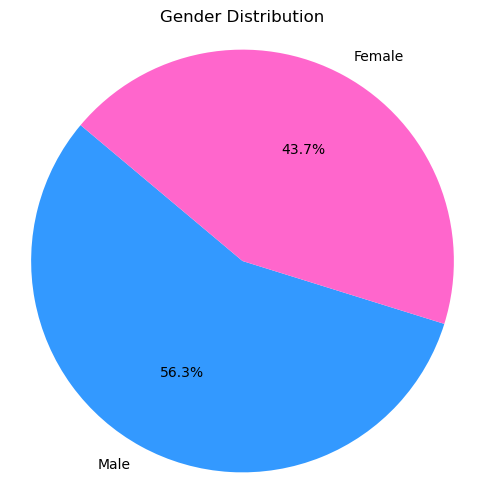

In [38]:
# 0:Nam 1:Nữ 
gender_counts = df['Gender'].value_counts()

labels = ['Male','Female']
sizes = [gender_counts.get(0,0), gender_counts.get(1,0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3399FF', '#FF66CC'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

### Age range

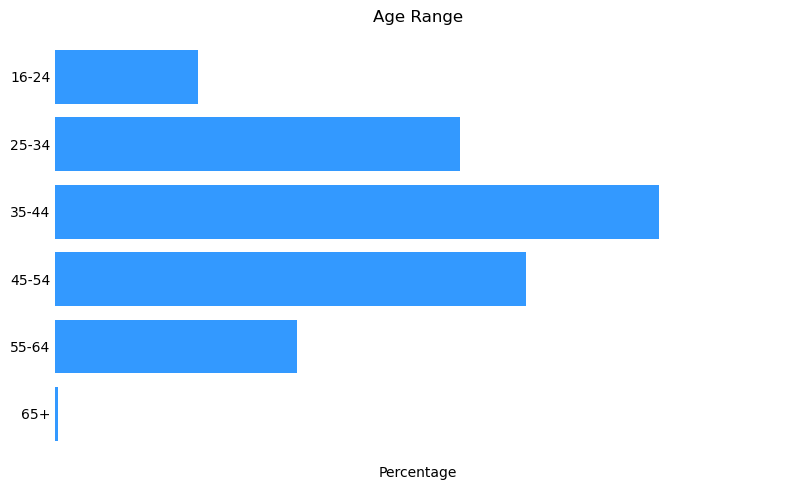

In [39]:
bins = [16, 24, 34, 44, 54, 64, 100]
labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']


# Step 3: Create a new column with age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 4: Count and normalize
age_groups_order = labels
age_counts = df['Age Range'].value_counts().reindex(age_groups_order, fill_value=0)
age_proportions = age_counts / age_counts.sum()

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.barh(age_groups_order, age_proportions, color='#3399FF')

plt.xlabel('Percentage')
plt.title('Age Range')

# Fix x-axis limit
max_value = age_proportions.max()
if max_value == 0:
    max_value = 1
plt.xlim(0, max_value * 1.2)

plt.xticks([])  # Hide numbers
plt.gca().invert_yaxis()

# Hide spines and ticks
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

In [40]:
df['Contract_ID'].value_counts()

Contract_ID
HD4018334318042840576    3
HD6513951671267010560    2
HD95068320938616656      2
HD7766642411918927872    2
HD3921092924113845248    2
                        ..
HD8599265079966296064    1
HD8458646383023177728    1
HD833075060753682432     1
HD832313328283286272     1
HD8699102014298207232    1
Name: count, Length: 20078, dtype: int64

In [41]:
duplicates = df[df['Contract_ID'].duplicated(keep=False)]
print(duplicates)


                 Contract_ID  Gender  Age          Region Managing Branch  \
390            SIM1000002024       0   59   02.Quang Ninh             HDG   
1325           SIM1000002024       0   49  14.Dong Nam Bo             CMU   
6725                     NaN       0   33             NaN             NaN   
6726                     NaN       0   43             NaN             NaN   
6727                     NaN       0   42             NaN             NaN   
...                      ...     ...  ...             ...             ...   
27380  HD8999751778095042560       1   48  07.Ho Chi Minh          HCM_04   
27736  HD3951366192358597632       1   44  07.Ho Chi Minh          HCM_04   
27791  HD4228402906153288704       0   36  07.Ho Chi Minh          HCM_04   
28556  HD1157350999381266688       0   49  07.Ho Chi Minh          HCM_04   
28557  HD1157350999381266688       0   26  07.Ho Chi Minh          HCM_04   

      Sales Unit Selling branch    Sales Region Creation Date OrderID/RegCo

In [42]:
duplicates = df['Contract_ID'].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Contract_ID
HD4018334318042840576    3
HD6513951671267010560    2
HD95068320938616656      2
HD7766642411918927872    2
HD3921092924113845248    2
HD6943743001756179456    2
HD5438888045443808256    2
HD6978055731008976896    2
HD3768871471804996096    2
HD1157350999381266688    2
SIM1000002024            2
HD8341352671055760384    2
HD7365966947959319552    2
HD8681003409337063424    2
HD4228402906153288704    2
HD3308571318735754752    2
HD4146503099255920128    2
HD3951366192358597632    2
HD5650852625765238784    2
HD157009308889108032     2
HD3319159152106828288    2
HD8358924727359758336    2
HD8873656229931550720    2
HD8999751778095042560    2
HD2736817424462745088    2
HD1938783856451533568    2
Name: count, dtype: int64


### Region Distribution

In [43]:
region_counts = df['Region'].value_counts()


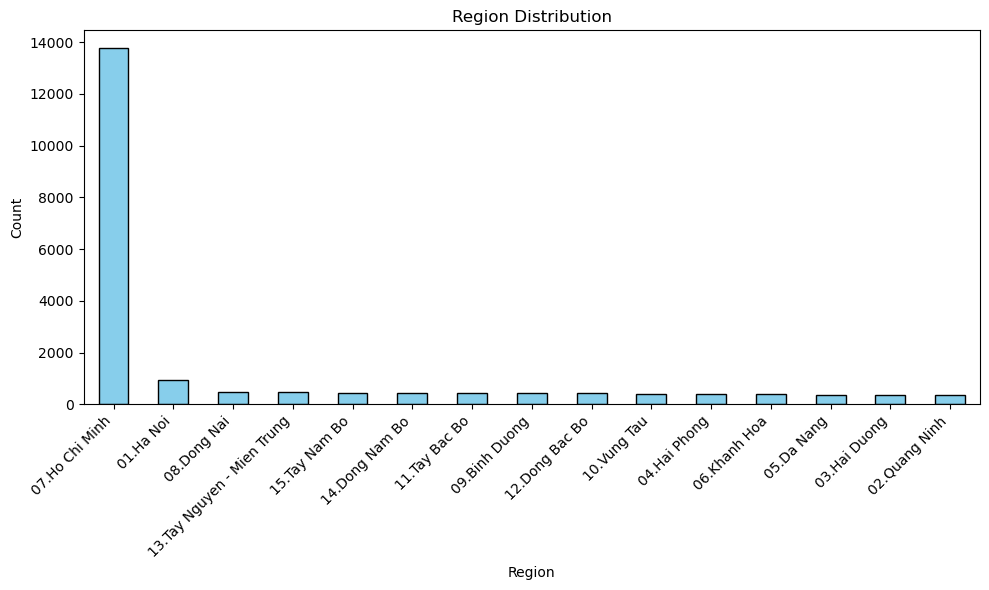

In [44]:
# Bar chart for better clarity
plt.figure(figsize=(10,6))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


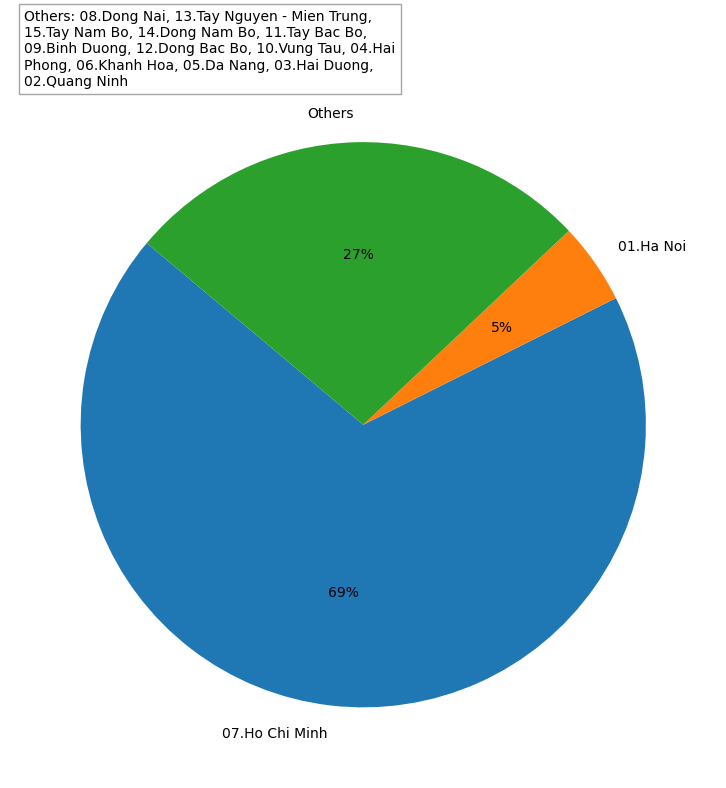

In [45]:
import textwrap

# Group small slices into 'Others'
threshold = 0.03  # 3% threshold
region_percents = df['Region'].value_counts(normalize=True)

# Split into large and small regions
large_regions = region_percents[region_percents > threshold]
small_regions = region_percents[region_percents <= threshold]

# Combine
combined = large_regions.copy()
combined['Others'] = small_regions.sum()

# Prepare note text and wrap it
others_text = "Others: " + ", ".join(small_regions.index.tolist())
wrapped_text = "\n".join(textwrap.wrap(others_text, width=50))  # wrap at 50 characters

# Plot pie chart
plt.figure(figsize=(10,8))
plt.pie(combined, labels=combined.index, autopct='%1.0f%%', startangle=140)

# Add wrapped note in the top-left
plt.text(-1.2, 1.2, wrapped_text, ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.show()


## Sales Performance Overview


### Total revenue

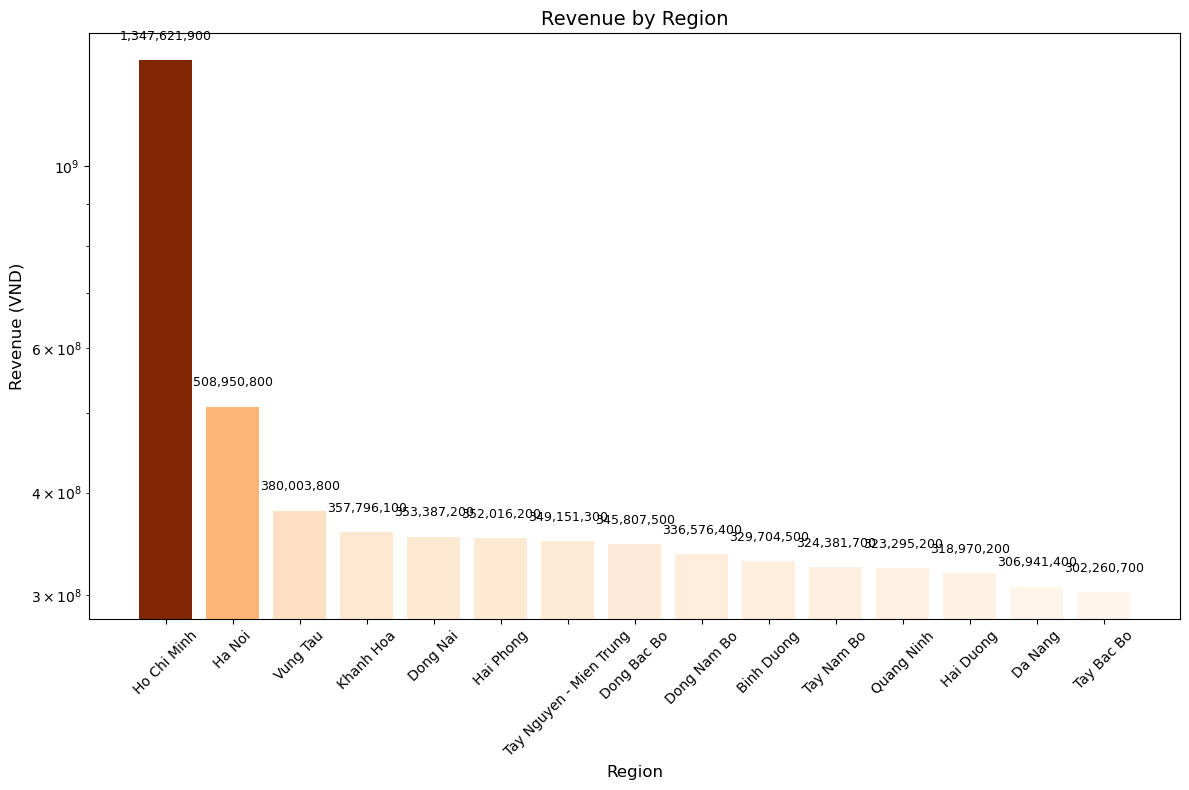

In [47]:
user_data = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_augmented.csv', encoding = 'latin1')

user_data['Region_clean'] = user_data['Region'].str.replace(r'^\d+\.', '', regex=True).str.strip()

region_revenue = user_data.groupby('Region_clean')['Revenue'].sum().sort_values(ascending=False)

safe_region_revenue = region_revenue.copy()
safe_region_revenue[safe_region_revenue == 0] = 1  # Avoid zero for log scale

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(safe_region_revenue.index, safe_region_revenue.values,
              color=plt.cm.Oranges(LogNorm(vmin=safe_region_revenue.min(), vmax=safe_region_revenue.max())(safe_region_revenue.values)))

# Add value labels on top of bars
for bar, value in zip(bars, region_revenue.values):
    ax.text(bar.get_x() + bar.get_width() / 2, value + value * 0.05,
            f"{int(value):,}", ha='center', va='bottom', fontsize=9)

# Set y-axis to log scale
ax.set_yscale('log')

# Titles and labels
ax.set_title('Revenue by Region', fontsize=14)
ax.set_ylabel('Revenue (VND)', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()